import cv2
import pyrealsense2
from realsense_depth import *

point = (400, 300)

def show_distance(event, x, y, args, params):
    global point
    point = (x, y)

# Initialize Camera Intel Realsense
dc = DepthCamera()

# Create mouse event
cv2.namedWindow("Color frame")
cv2.setMouseCallback("Color frame", show_distance)

while True:
    ret, depth_frame, color_frame = dc.get_frame()

    # Show distance for a specific point
    cv2.circle(color_frame, point, 4, (0, 0, 255))
    distance = depth_frame[point[1], point[0]]

    cv2.putText(color_frame, "{}mm".format(distance), (point[0], point[1] - 20), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 0), 2)

    cv2.imshow("depth frame", depth_frame)
    cv2.imshow("Color frame", color_frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

In [1]:
import cv2
import pyrealsense2
from realsense_depth import *
import numpy as np
from matplotlib import pyplot as plt
point = (400, 300)

# Initialize Camera Intel Realsense
dc = DepthCamera()

ret, depth_frame, color_frame = dc.get_frame()
distance = depth_frame[point[1], point[0]]
print(distance)

982


In [14]:
depth_frame.shape

(480, 640)

(100,)
(101,)


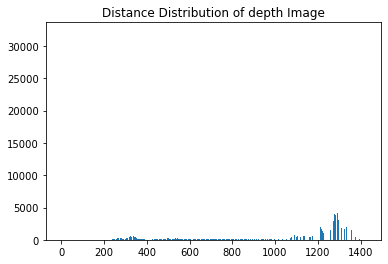

In [2]:
ret, depth_frame, color_frame = dc.get_frame()
df = np.asarray(depth_frame).flatten()
hi=np.histogram(df,bins=100)
print(hi[0].shape)
print(hi[1].shape)

plt.hist(df,bins=1800)
plt.title("Distance Distribution of depth Image")
plt.show()

In [3]:
unique, counts = np.unique(df, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 32066]
 [  237     8]
 [  238    36]
 ...
 [ 1417     3]
 [ 1421     6]
 [ 1424     2]]


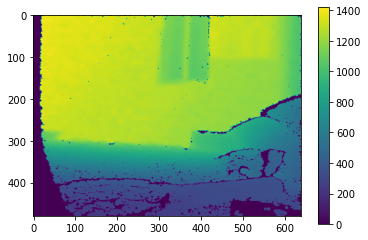

In [4]:
plt.imshow(depth_frame)
plt.colorbar()
plt.show()

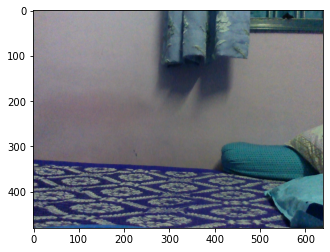

In [5]:
plt.imshow(color_frame)
plt.show()

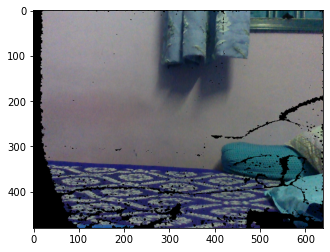

QObject::moveToThread: Current thread (0x55ef331494f0) is not the object's thread (0x55ef33318230).
Cannot move to target thread (0x55ef331494f0)

QObject::moveToThread: Current thread (0x55ef331494f0) is not the object's thread (0x55ef33318230).
Cannot move to target thread (0x55ef331494f0)

QObject::moveToThread: Current thread (0x55ef331494f0) is not the object's thread (0x55ef33318230).
Cannot move to target thread (0x55ef331494f0)

QObject::moveToThread: Current thread (0x55ef331494f0) is not the object's thread (0x55ef33318230).
Cannot move to target thread (0x55ef331494f0)

QObject::moveToThread: Current thread (0x55ef331494f0) is not the object's thread (0x55ef33318230).
Cannot move to target thread (0x55ef331494f0)

QObject::moveToThread: Current thread (0x55ef331494f0) is not the object's thread (0x55ef33318230).
Cannot move to target thread (0x55ef331494f0)

QObject::moveToThread: Current thread (0x55ef331494f0) is not the object's thread (0x55ef33318230).
Cannot move to tar

In [6]:
def box_pos(x_coord, y_coord, width, height, centered=0):
    if centered == 0:
        start_point = (x_coord, y_coord) # represents the top left corner of rectangle
        end_point = (x_coord+width-1, y_coord+height-1)  # represents the bottom right corner of rectangle
    elif centered == 1:
        new_x = x_coord - (np.floor(width/2)-1).astype(int)
        new_y = y_coord - (np.floor(height/2)-1).astype(int)
        start_point = (new_x, new_y) 
        end_point = (new_x+width, new_y+height)
    return start_point, end_point

start_point,end_point = box_pos(320, 240, 300, 5, centered=1)  #x,y,width,height, 0-- top left coord, 1--- center coord

cf = color_frame
for i in range (color_frame.shape[0]):
    for j in range (color_frame.shape[1]):
        if depth_frame[i][j] == 0:
            cf[i][j] = [0 , 0, 0] 

plt.imshow(cf)
plt.show()
window_name = 'Filtered_image'  # Window name in which image is displayed

cv2.rectangle(cf, start_point, end_point, (0, 0, 255), 1)

cv2.imshow(window_name, cf)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
color_crop_img = cf[start_point[1]:end_point[1], start_point[0]:end_point[0]]
crop_img = depth_frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]

crop_img.shape
#cv2.imshow("cropped", crop_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

(5, 300)

In [8]:
li=[]
for i in range(crop_img.shape[0]):
    ci = crop_img[i][crop_img[i]!=0] #filter out 0 values (mostly errors)
    li.append(np.mean(ci)) 
li

[1241.9333333333334, 1242.39, 1242.74, 1243.01, 1243.2233333333334]

In [9]:
li = np.asarray(li)
print(li.shape)
data_centered = li

(5,)


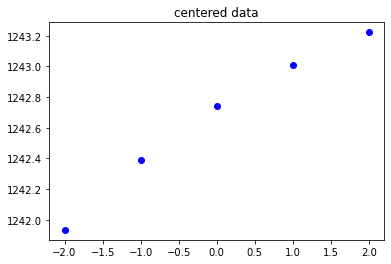

In [10]:
idx=np.floor(len(data_centered)/2).astype(int)
if len(data_centered)%2 == 1:
    xx=np.arange(-idx,idx+1)
else:
    xx=np.arange(-idx,idx)
plt.title("centered data") 
plt.plot(xx, data_centered,"ob") 
plt.show() 

In [11]:
mn = np.mean(crop_img[crop_img!=0])
print(mn)

1242.6593333333333
